In [25]:
### FINAL PROJECT - PABLO GARCIA (13159411)

### 1. INITIAL STEPS

# First, I will import OS, scikit learn, keras and rest of libraries I will use during the feature selection and modelling
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'#I will use theano as keras backend
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.utils import np_utils

In [2]:
# When running the code from a different machine, please change the file location
data_train = pd.read_csv (r'/Users/jose/Documents/MSc_Data_Science/Year_2/Final project/Data Scania trucks/aps_failure_training_set.csv', sep= ",")
data_test = pd.read_csv (r'/Users/jose/Documents/MSc_Data_Science/Year_2/Final project/Data Scania trucks/aps_failure_test_set.csv', sep= ",")
data_train.head()
print(data_train.dtypes)

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object


In [3]:
### 2. DATA PRE-PROCESSING

## Train dataset: I will first convert train object data into numeric data, except the target variable 'class'

list_col = list(data_train.iloc[:,1:171])
data_train[list_col] = data_train[list_col].apply(pd.to_numeric, errors="coerce")
print(data_train.dtypes)

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [4]:
## MISSING VALUES
# Train dataset: Replacing the na values of the train dataset with the previous value using 'ffill'
data_train = data_train.fillna(method='ffill')
data_train.dropna(inplace = True)
data_train.isnull().sum().sum()
data_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
13,neg,118950,0.0,1390.0,1298.0,0.0,0.0,0.0,0.0,0.0,...,1677646.0,1380302.0,2531322.0,426284.0,17996.0,11734.0,12506.0,138.0,0.0,0.0
14,neg,24416,0.0,0.0,1298.0,0.0,0.0,0.0,0.0,0.0,...,190606.0,95674.0,207476.0,232470.0,154962.0,99406.0,121544.0,2712.0,0.0,0.0
15,neg,14,0.0,62.0,34.0,0.0,0.0,0.0,0.0,0.0,...,248.0,42.0,48.0,28.0,32.0,10.0,0.0,0.0,0.0,0.0
16,neg,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
17,neg,736,2.0,24.0,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0


In [5]:
# Test dataset: I will now convert test object data into numeric data, except the target variable 'class'

list_col_t = list(data_test.iloc[:,1:171])
data_test[list_col_t] = data_test[list_col_t].apply(pd.to_numeric, errors="coerce")
print(data_test.dtypes)

# Replacing the na values from the test dataset with the previous value using 'ffill'

data_test = data_test.fillna(method='ffill')
data_test.dropna(inplace = True)
data_test.isnull().sum().sum()
data_test.head()

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
12,neg,33072,0.0,1.672000e+03,1378.0,0.0,0.0,0.0,0.0,0.0,...,533668.0,188530.0,308002.0,355434.0,31382.0,6334.0,1202.0,22.0,0.0,0.0
13,neg,30664,0.0,5.300000e+02,514.0,0.0,0.0,0.0,0.0,0.0,...,248048.0,125438.0,262020.0,273194.0,166606.0,124448.0,167498.0,98.0,0.0,0.0
14,neg,41628,0.0,2.130706e+09,380.0,0.0,0.0,0.0,0.0,0.0,...,415556.0,209392.0,651410.0,298746.0,163608.0,125018.0,89162.0,12.0,0.0,0.0
15,neg,1204,0.0,2.130706e+09,380.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,neg,1434,0.0,3.200000e+01,26.0,0.0,0.0,0.0,0.0,0.0,...,3532.0,1852.0,5064.0,54170.0,410.0,14.0,0.0,0.0,0.0,0.0


In [6]:
## NORMALISATION
X_train_raw = pd.DataFrame(data_train.loc[:, list_col].values,columns = list_col)
y_train_raw = pd.DataFrame(data_train.loc[:,['class']].values,columns = ['class'])
X_test_raw = data_test.loc[:, list_col].values
y_test = data_test.loc[:, 'class'].values

mm_scaler = preprocessing.MinMaxScaler()
X_train_norm = pd.DataFrame(mm_scaler.fit_transform(X_train_raw),columns = list_col)
X_test = pd.DataFrame(mm_scaler.transform(X_test_raw), columns = list_col)

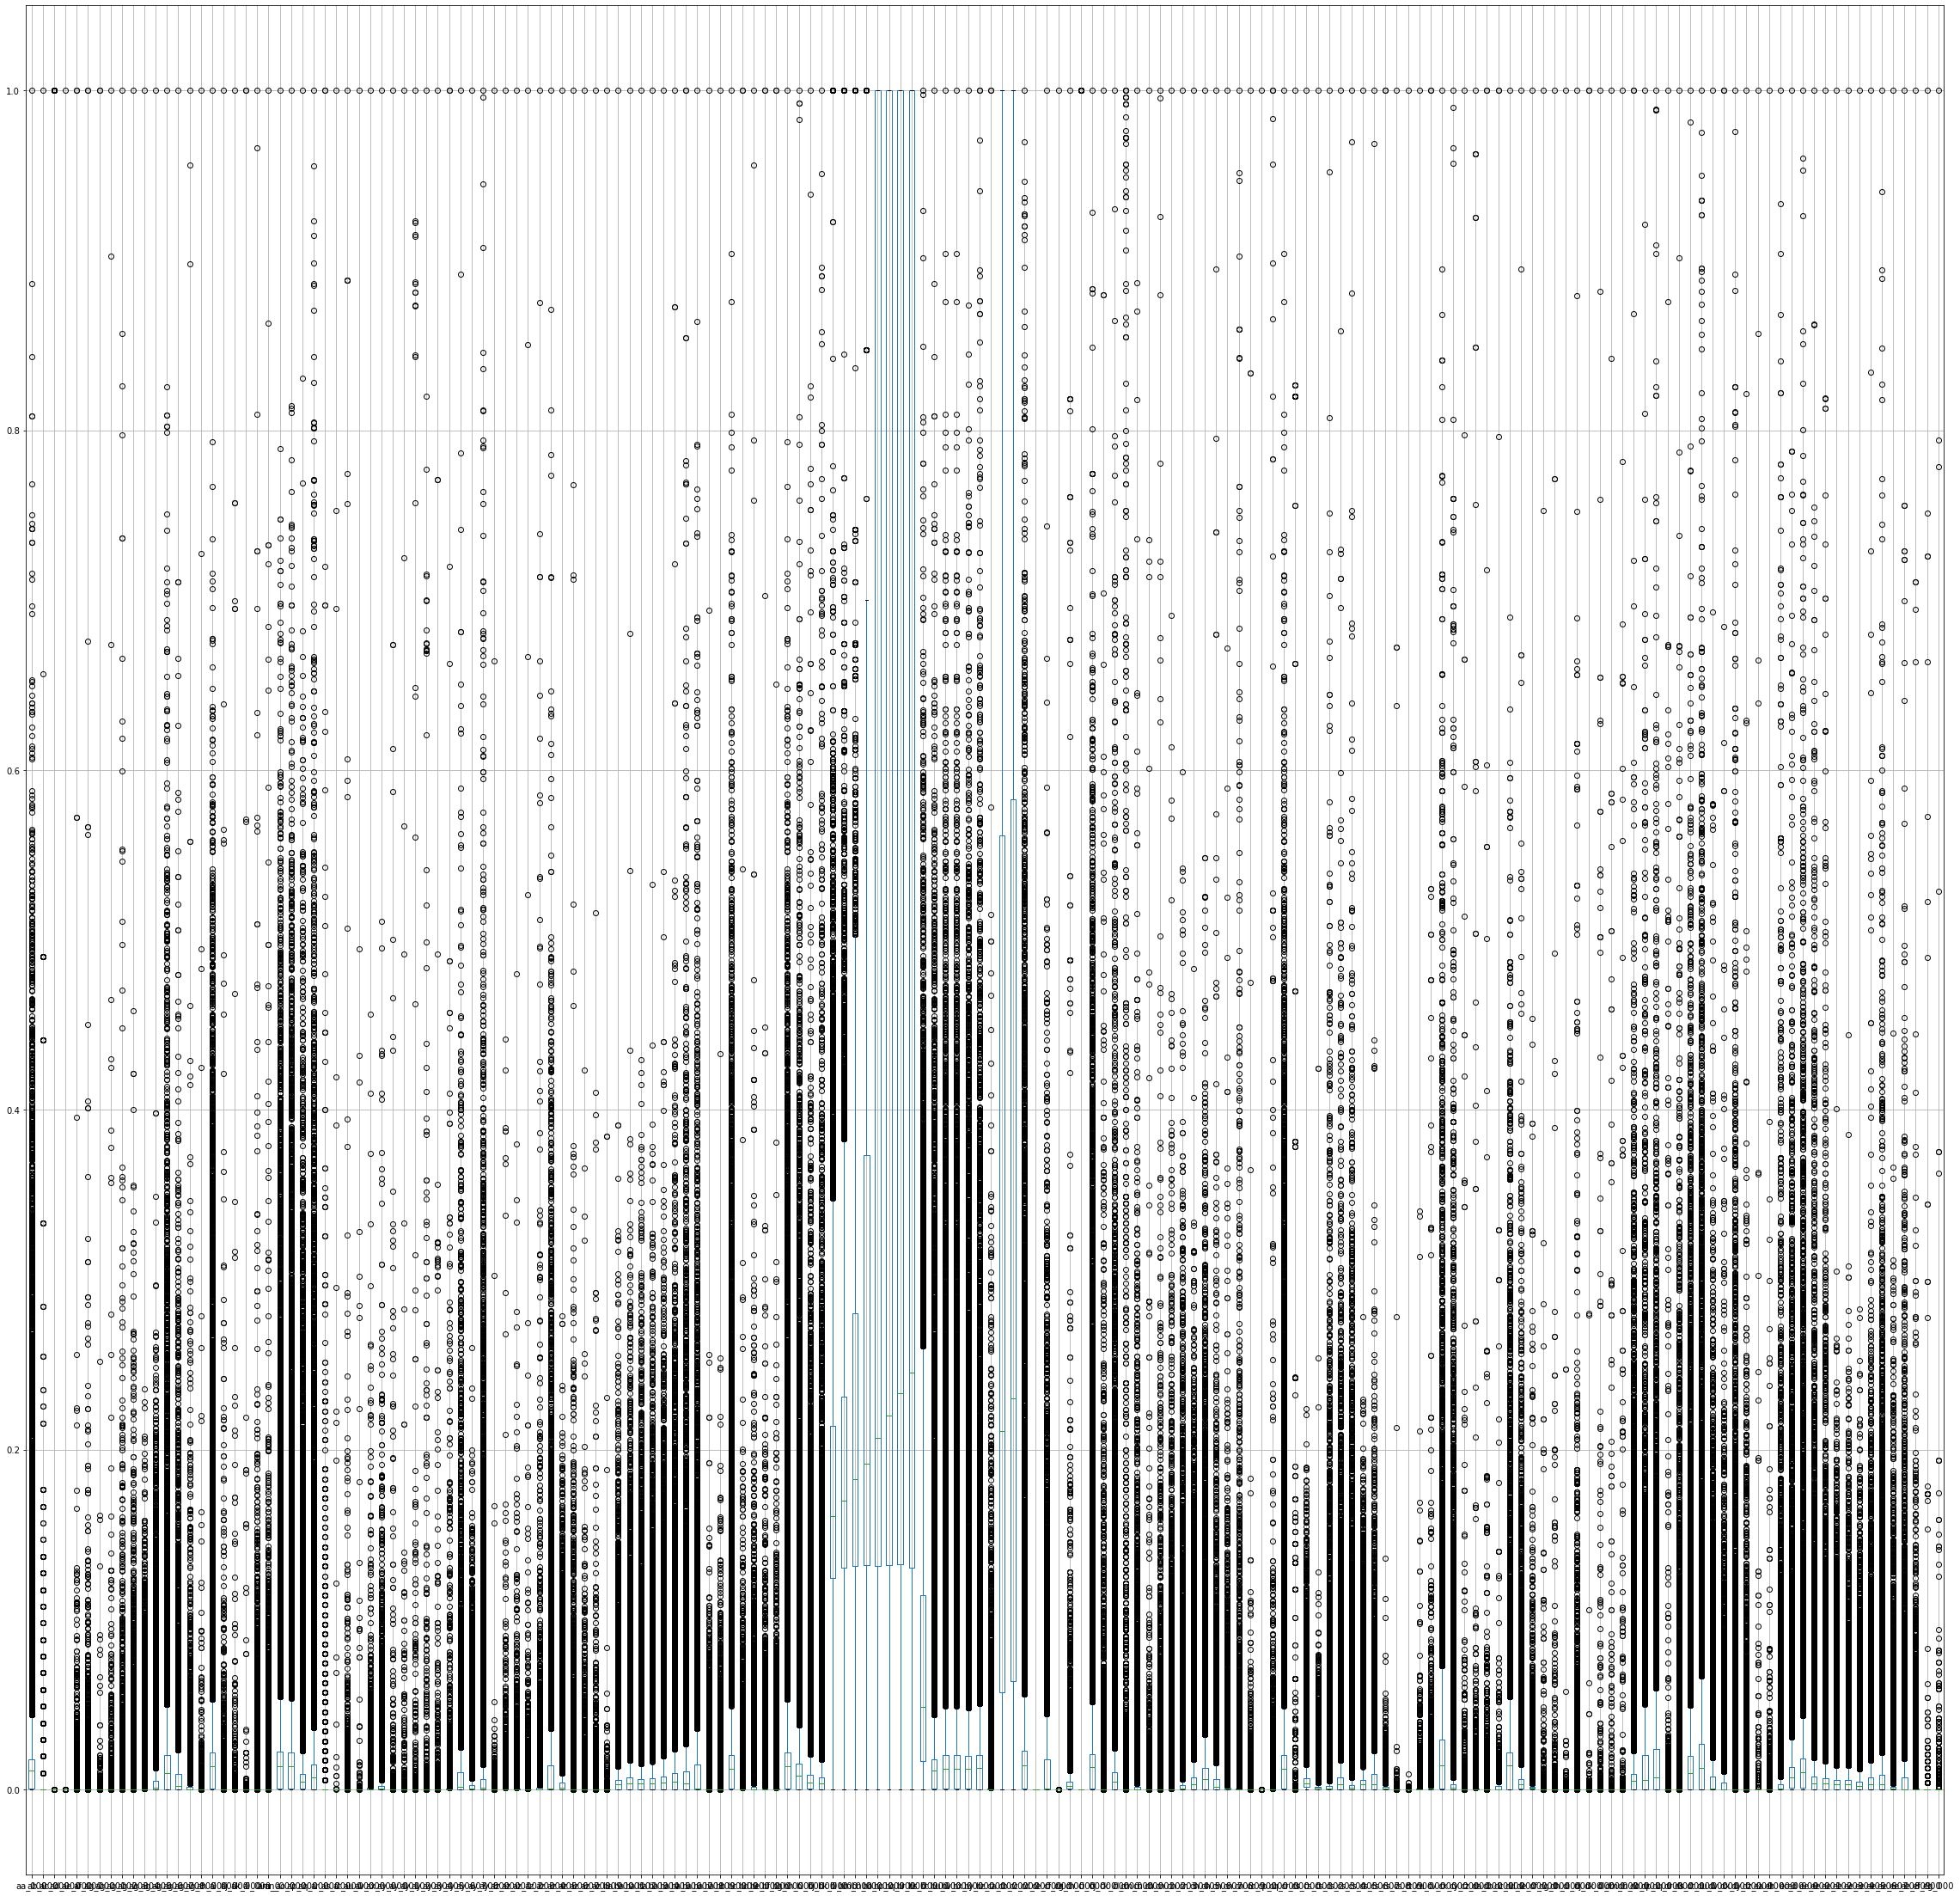

In [7]:
## VISUALISATION
# SCATTER BOXPLOT
X_train_norm.boxplot(figsize=(40,40))
pyplot.show()

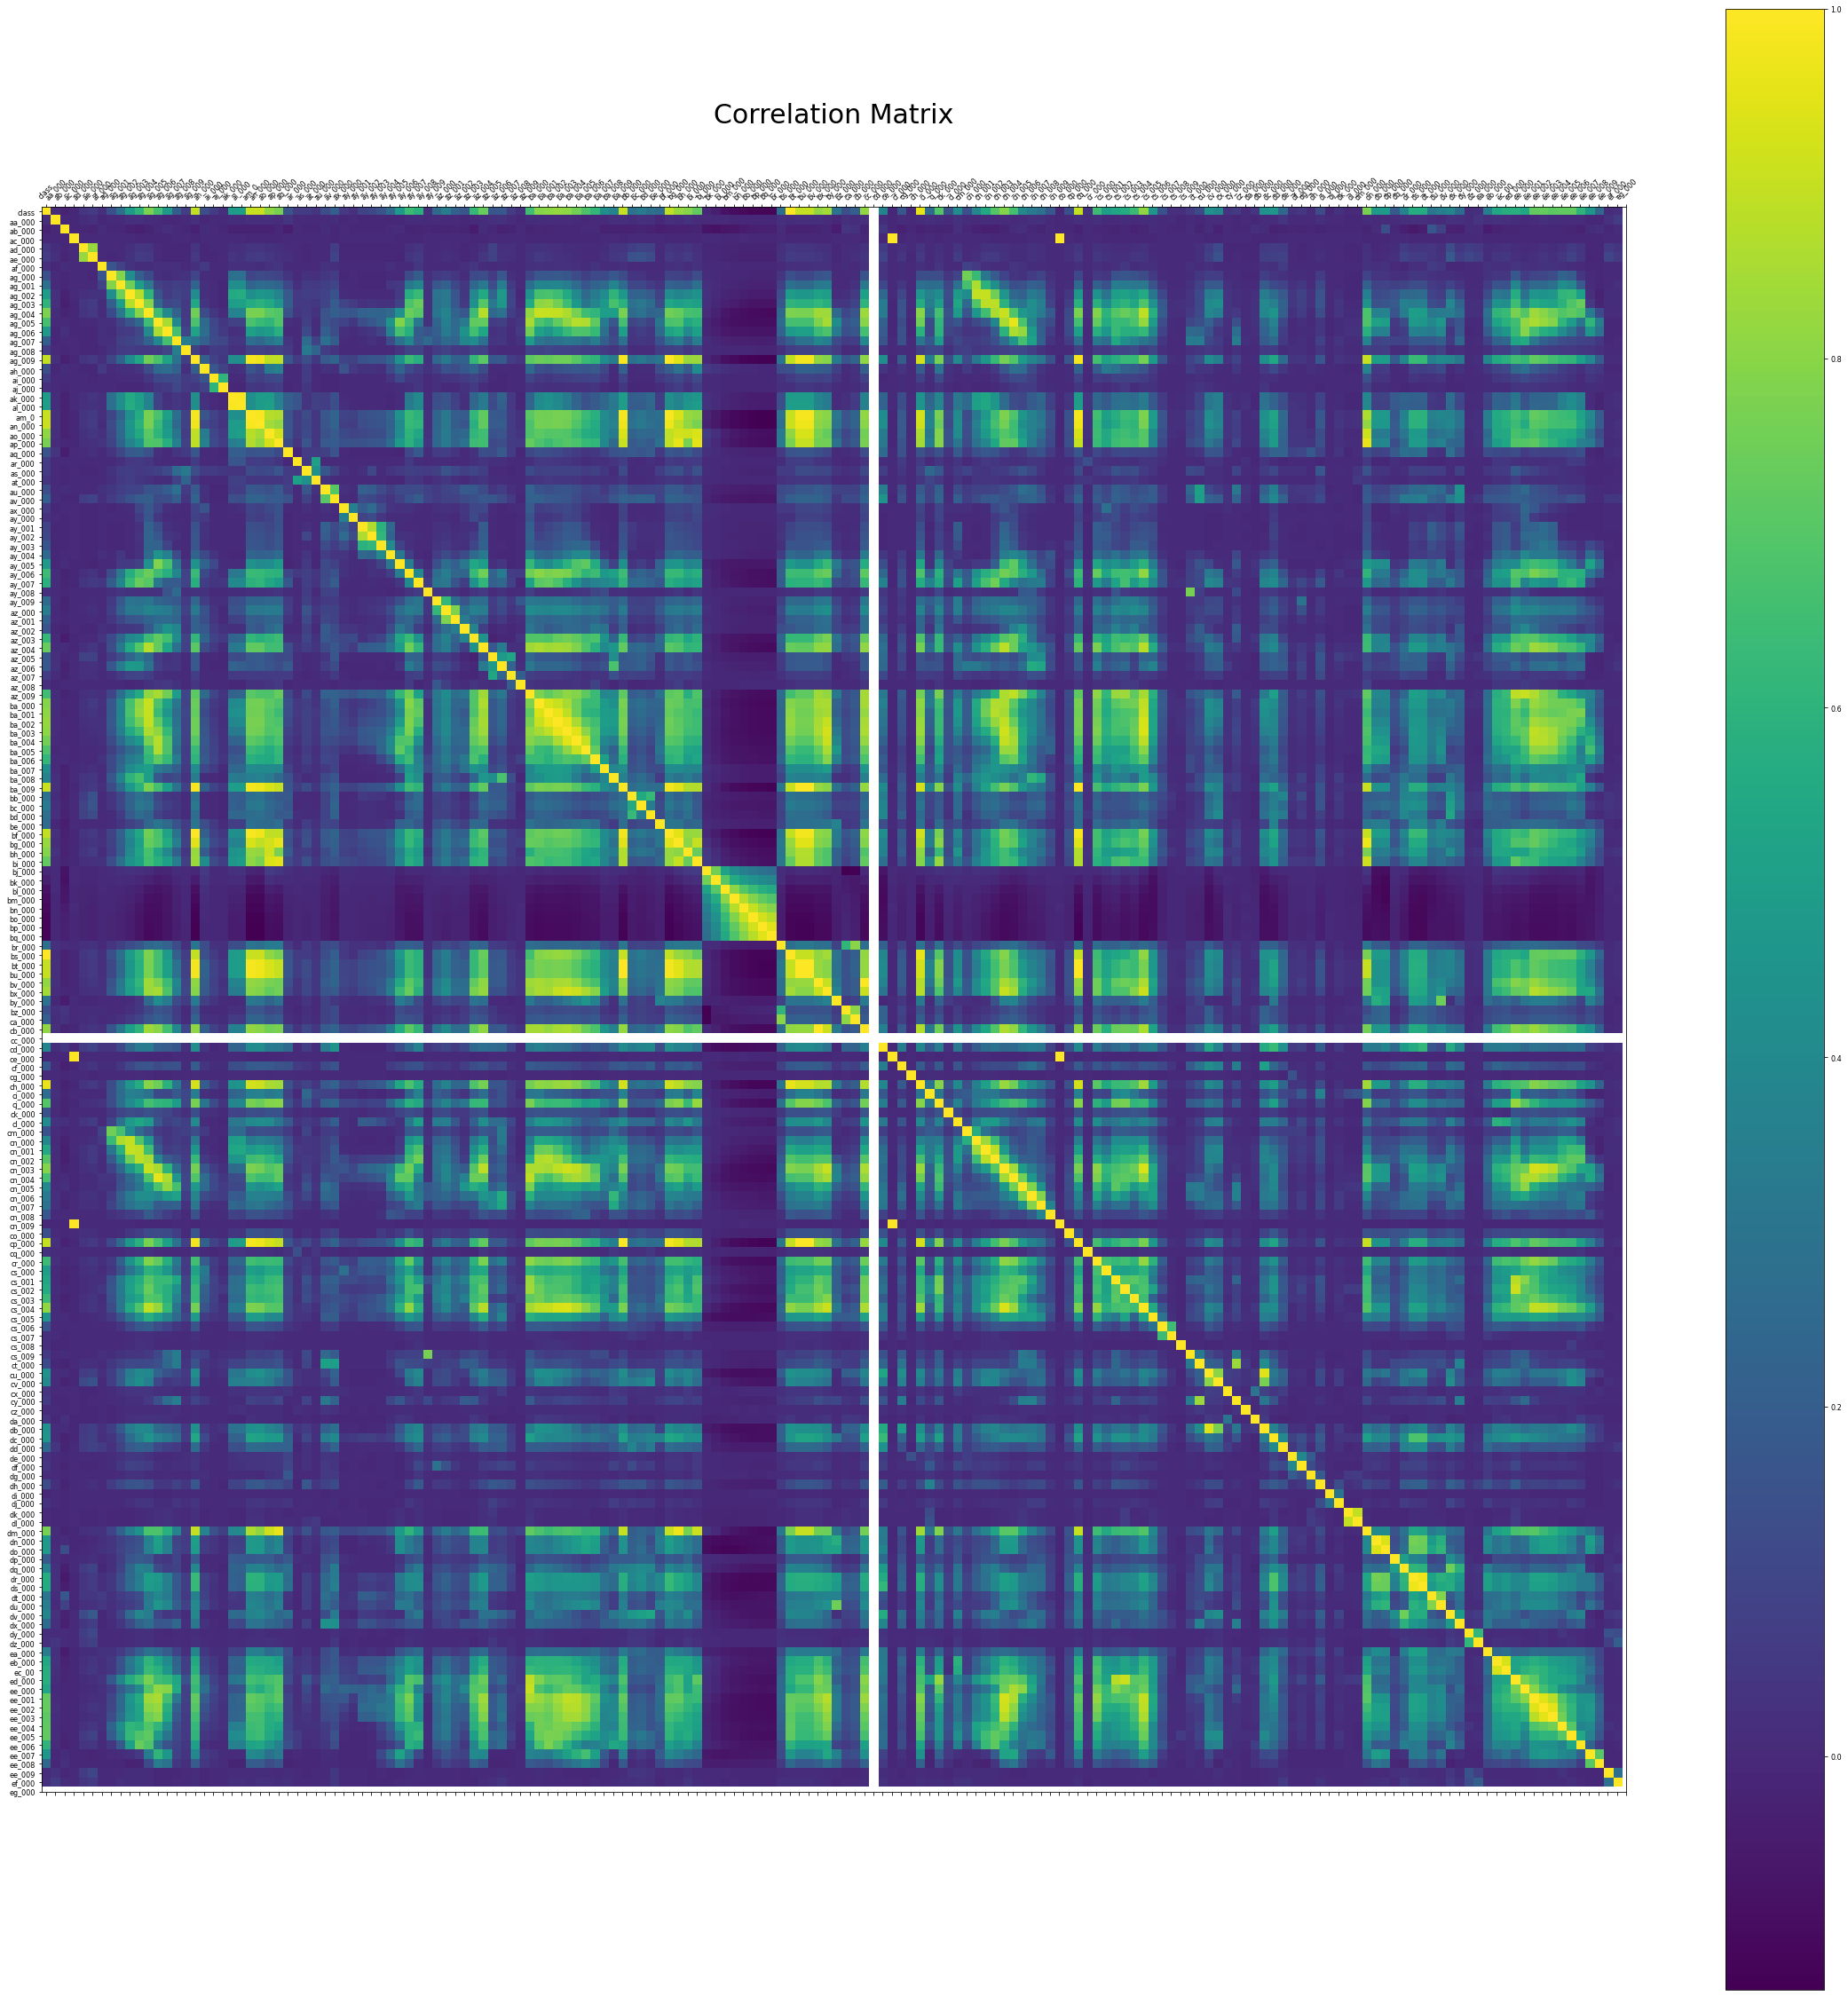

In [8]:
# CORRELATION MATRIX
f = plt.figure(figsize=(40, 40))
plt.matshow(data_train.corr(), fignum=f.number)
plt.xticks(range(data_train.shape[1]), data_train.columns, fontsize=8, rotation=45)
plt.yticks(range(data_train.shape[1]), data_train.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=30);

Class 0: 58988
Class 1: 999


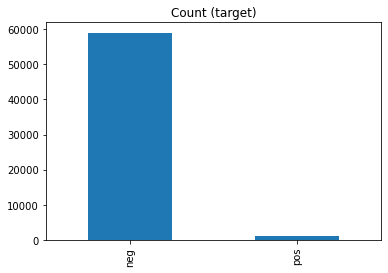

In [9]:
## REBALANCING - The dataset is not balanced, since we have 59000 negatives and 100 positives
target_count = data_train['class'].value_counts()
print('Class 0:', target_count['neg'])
print('Class 1:', target_count['pos'])
target_count.plot(kind='bar', title='Count (target)')

In [10]:
# I have combined oversampling (SMOTE) with random undersampling.

# I will first oversample the minority class using the SMOTE method.
over_sampler = SMOTE(sampling_strategy='minority')

# Then I fit the object to our training data
X_smote, y_smote = over_sampler.fit_sample(X_train_norm,y_train_raw)

# Finally I undersample randomly the majority class
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# The new X, Y and training dataset are consequently changed
X_train, y_train = under_sampler.fit_sample(X_smote, y_smote)
data_resampled = pd.concat([y_train, X_train], axis=1)
data_resampled.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,0.000624,0.000000,0.000000e+00,2.329835e-09,0.0,0.0,0.0,0.0,0.0,...,7.316454e-05,9.666726e-05,3.072081e-04,7.195235e-04,1.961540e-06,0.000000e+00,0.000000,0.000000,0.0,0.0
1,neg,0.014576,0.009804,8.541767e-08,2.003658e-08,0.0,0.0,0.0,0.0,0.0,...,4.242414e-03,4.800787e-03,3.836139e-03,6.309019e-03,7.262002e-03,1.288107e-03,0.010010,0.001164,0.0,0.0
2,neg,0.003843,0.000000,0.000000e+00,4.193704e-09,0.0,0.0,0.0,0.0,0.0,...,4.798116e-03,5.562737e-03,3.353701e-04,9.795381e-05,3.929408e-05,2.207725e-06,0.000005,0.000000,0.0,0.0
3,neg,0.000004,0.000000,3.754623e-09,9.319341e-10,0.0,0.0,0.0,0.0,0.0,...,7.185574e-07,9.004621e-07,7.205176e-07,1.218764e-06,6.327549e-08,0.000000e+00,0.000000,0.000000,0.0,0.0
4,neg,0.000013,0.000000,0.000000e+00,4.030615e-08,0.0,0.0,0.0,0.0,0.0,...,7.031598e-06,1.165304e-06,3.293795e-07,5.919711e-07,1.518612e-06,1.672519e-08,0.000000,0.000000,0.0,0.0


Class 0: 58988
Class 1: 58988


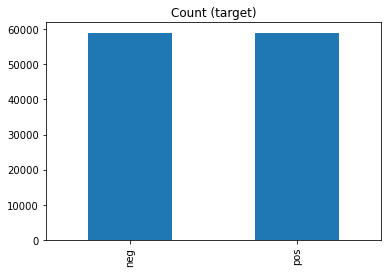

In [11]:
# I will count positive and negative class values to verify they are rebalanced
r_target_count = data_resampled['class'].value_counts()
print('Class 0:', r_target_count['neg'])
print('Class 1:', r_target_count['pos'])
r_target_count.plot(kind='bar', title='Count (target)')

In [12]:
### 3. FEATURE SELECTION AND FEATURE EXTRACTION

## 3.1 FEATURE SELECTION

# 3.2.1 SelectKbest
# I will use the SelectKbest function with chi2 to do a statistical test
# and learn which are the best 10 features that provide more information. It works because I 
# do not have any negative values in the dataset
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(15,'Score'))  # print 15 best features

    Feature_Name         Score
94        ci_000  12226.956356
88        cc_000  11978.237437
62        bb_000  11346.427988
82        bv_000  11314.738572
81        bu_000  11314.737699
111       cq_000  11314.737378
16        ah_000  10836.888512
67        bg_000  10801.334971
0         aa_000  10776.686158
80        bt_000  10725.437891
23        ao_000  10658.006538
22        an_000  10651.434888
83        bx_000  10065.893392
84        by_000  10062.497570
25        aq_000   9907.465726


In [13]:
## FEATURE EXTRACTION

# 3.2.1 PCA dimensionality reduction

pca = PCA(n_components=15)
fit_pca = pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
# eigenvectors = pd.DataFrame(data = X_t_train
  #           , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print("Explained Variance: %s" % fit_pca.explained_variance_ratio_)
print(fit_pca.components_)

Explained Variance: [0.34115414 0.22813551 0.07683005 0.06216724 0.03927981 0.03454583
 0.02823666 0.02668993 0.02403037 0.01585981 0.01126156 0.01039925
 0.00823194 0.00728571 0.00552879]
[[ 1.56238437e-01  1.56320844e-04 -3.52999948e-02 ...  9.33516135e-03
   2.46127553e-04  7.71149267e-05]
 [ 1.12010586e-01 -6.94575083e-05 -3.74157906e-02 ...  5.69631591e-03
   4.55390273e-05  3.47662245e-06]
 [-3.06823266e-02  5.06349342e-04 -6.67465346e-02 ... -3.62899207e-03
   5.27386701e-05  1.29276299e-04]
 ...
 [ 4.91740831e-03 -3.62382135e-04 -1.43682806e-03 ...  9.90816922e-03
   3.76388861e-04  1.07644120e-03]
 [-1.34560917e-01  2.38975714e-05 -1.71448222e-02 ...  2.16716926e-02
  -3.48581150e-04 -1.18072110e-03]
 [ 7.41222730e-02 -9.06284208e-04  4.35865193e-03 ...  6.88307334e-03
   6.45882428e-03  2.61913287e-03]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


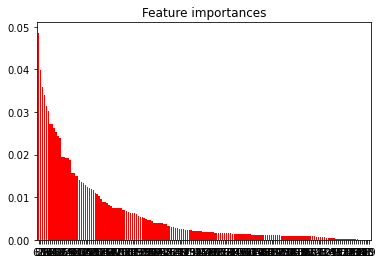

In [14]:
# 3.2.2 ExtraTrees classifier
model_xtrees = ExtraTreesClassifier()
model_xtrees.fit(X_train, y_train)

feature_importance = model_xtrees.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importance[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [16]:
### 4. ALGORITHM SELECTION

## 4.1. Classification with Logistic Regression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
print("accuracy: {:.6f}".format(clf_log.score(X_test, y_test)))
y_pred_log = clf_log.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy: 0.973292


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
## 4.2. Classification with Decision Trees
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
print("accuracy: {:.6f}".format(clf_tree.score(X_test, y_test)))
y_pred_tree = clf_tree.predict(X_test)

accuracy: 0.981298


In [28]:
## 4.3. Classification with Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_t_train, y_train)
print("accuracy: {:.6f}".format(clf_rf.score(X_t_test, y_test)))
y_pred_rf = clf_rf.predict(X_t_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy: 0.978484


In [30]:
# 4.4. Neural networks

# I will first convert the target class into some categorical variable.
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)
# I define the keras model with the NN structure below
model = Sequential([
  Dense(64, activation='relu', input_shape=(15,)), 
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_t_train, y_train_enc, epochs=20, batch_size=250)

test_loss, test_acc = model.evaluate(X_t_test, y_test_enc)
print('Test accuracy:', test_acc)

Epoch 1/20
117976/117976 [==============================] - 6s 47us/step - loss: 0.2076 - accuracy: 0.9283
Epoch 2/20
117976/117976 [==============================] - 3s 29us/step - loss: 0.1416 - accuracy: 0.9539
Epoch 3/20
117976/117976 [==============================] - 4s 33us/step - loss: 0.1312 - accuracy: 0.9570
Epoch 4/20
117976/117976 [==============================] - 3s 28us/step - loss: 0.1228 - accuracy: 0.9588
Epoch 5/20
117976/117976 [==============================] - 3s 29us/step - loss: 0.1157 - accuracy: 0.9608
Epoch 6/20
117976/117976 [==============================] - 5s 40us/step - loss: 0.1092 - accuracy: 0.9628
Epoch 7/20
117976/117976 [==============================] - 5s 42us/step - loss: 0.1042 - accuracy: 0.9647
Epoch 8/20
117976/117976 [==============================] - 4s 34us/step - loss: 0.0993 - accuracy: 0.9663
Epoch 9/20
117976/117976 [==============================] - 4s 33us/step - loss: 0.0943 - accuracy: 0.9680
Epoch 10/20
117976/117976 [==========